* https://pytorch.org/tutorials/beginner/nn_tutorial.html

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
from matplotlib import pyplot
import numpy as np

## 1.0 MNIST data setup

In [2]:
from pathlib import Path
import requests
import pickle
import gzip

In [10]:
DATA_PATH = Path("../data")
PATH = DATA_PATH / "mnist"

In [11]:
str(PATH)

'..\\data\\mnist'

In [12]:
PATH.is_dir()

True

In [13]:
PATH.mkdir(parents=True, exist_ok=True)

In [14]:
URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

In [15]:
if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

In [16]:
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


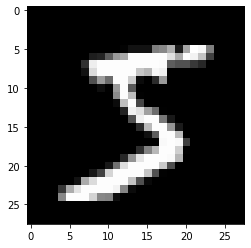

In [12]:
pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [17]:
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [22]:
weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [23]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [18]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [20]:
bs = 64  # batch size

In [24]:
xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.2999, -2.4753, -1.8542, -2.4766, -2.3950, -2.5335, -2.3804, -1.8193,
        -2.3786, -2.8628], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [25]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3445, grad_fn=<NegBackward>)


In [27]:
print(preds.shape, yb.shape)

torch.Size([64, 10]) torch.Size([64])


In [28]:
yb.shape[0]

64

In [29]:
def nll0(input, target):
    return -input[range(target.shape[0]), target]

In [30]:
nll0(preds, yb)

tensor([2.5335, 2.2313, 2.3398, 2.6907, 2.4980, 1.8408, 2.6608, 2.4245, 2.2963,
        2.4072, 2.4399, 2.3242, 2.0592, 2.5686, 2.3591, 2.0667, 2.1178, 2.7916,
        2.2772, 2.4091, 2.6619, 2.2629, 2.8601, 2.6727, 2.2451, 1.9597, 2.4855,
        2.2757, 2.3312, 2.0162, 2.1809, 2.1426, 2.1234, 2.2202, 2.2564, 2.4575,
        2.1644, 1.9704, 2.2832, 2.0592, 2.3677, 2.9126, 2.1298, 2.6076, 2.3488,
        3.0314, 2.7281, 2.6804, 2.3512, 2.3212, 2.3363, 1.7089, 2.4574, 2.1917,
        2.3436, 2.6273, 1.7476, 2.9926, 2.4646, 2.6594, 2.0413, 2.1734, 1.9000,
        1.9575], grad_fn=<NegBackward>)

In [32]:
preds

tensor([[-2.2999, -2.4753, -1.8542, -2.4766, -2.3950, -2.5335, -2.3804, -1.8193,
         -2.3786, -2.8628],
        [-2.2313, -2.4773, -2.3618, -2.3967, -2.2264, -2.5247, -2.3853, -1.9092,
         -2.1067, -2.6107],
        [-2.4653, -2.6820, -2.3363, -1.8326, -2.3398, -2.6823, -1.9454, -2.2646,
         -2.4227, -2.4116],
        [-2.5020, -2.6907, -2.1751, -2.4685, -2.1923, -2.5407, -2.6100, -1.5605,
         -2.5601, -2.2967],
        [-2.3396, -2.2288, -1.8638, -2.3982, -2.4125, -2.7391, -1.8789, -2.2781,
         -2.8421, -2.4980],
        [-2.1377, -2.3094, -1.8408, -2.2693, -2.2077, -2.5230, -2.3721, -2.2794,
         -2.4646, -2.9991],
        [-2.4730, -2.6608, -1.7171, -2.6192, -2.4038, -2.3865, -2.5034, -2.2143,
         -2.5619, -1.9462],
        [-2.1118, -2.8672, -1.8519, -2.4245, -2.3206, -2.8358, -2.2641, -1.9139,
         -2.4560, -2.4942],
        [-2.3479, -2.2963, -2.0832, -2.5828, -2.3011, -2.3331, -2.6167, -2.1132,
         -2.3462, -2.1461],
        [-2.8149, -